In [5]:
import medmnist
from medmnist import INFO, Evaluator

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

# Testing dataset

In [6]:
data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [12]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

labels_train = train_dataset.labels
labels_val = val_dataset.labels
labels_test = test_dataset.labels

Using downloaded and verified file: /home/vini/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/vini/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/vini/.medmnist/breastmnist.npz


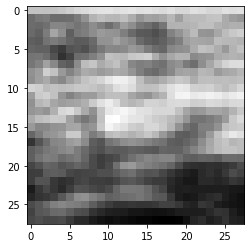

In [28]:
# visualizing the images
img_train = train_dataset.imgs
img_val = val_dataset.imgs
img_test = test_dataset.imgs

i = 0
plt.imshow(img_train[i], cmap="Greys_r")
plt.show()

In [14]:
print(train_dataset)
print("========================================")
print(val_dataset)
print("========================================")
print(test_dataset)

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: /home/vini/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: /home/vini/.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'maligna

/home/vini/.local/lib/python3.10/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


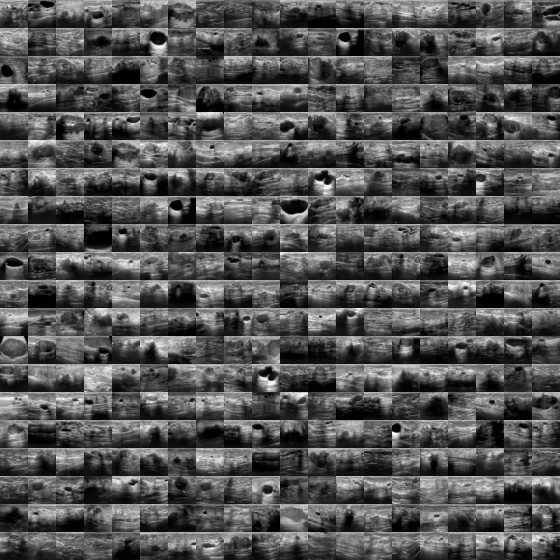

In [15]:
train_dataset.montage(length = 20)

# Checking the balance between clases

In [18]:
print(f"TRAINING: {np.count_nonzero(labels_train == 0)} cancer e {np.count_nonzero(labels_train == 1)} normais")
print(f"VALIDATION: {np.count_nonzero(labels_val == 0)} cancer e {np.count_nonzero(labels_val == 1)} normais")
print(f"TEST: {np.count_nonzero(labels_test == 0)} cancer e {np.count_nonzero(labels_test == 1)} normais")

TRAINING: 147 cancer e 399 normais
VALIDATION: 21 cancer e 57 normais
TEST: 42 cancer e 114 normais


In [19]:
print((147+21)/(147+21+399+57))

0.2692307692307692
